In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [34]:
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


Checking the Columns

In [35]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [36]:
print(star_wars.head(1))

yesnomap = {"Yes":True,"No":False}

haveyouseen=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]

areyouafan = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]







   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
1  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
1  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
1  Star Wars: Episode VI Return of the Jedi   

  Please rank the Star Wars 

In [37]:
print(haveyouseen.head())
yesnomap = {"Yes":True,"No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]  = haveyouseen.map(yesnomap)
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].head())

1    Yes
2     No
3    Yes
4    Yes
5    Yes
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object
1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool


In [38]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = areyouafan.map(yesnomap)

In [39]:
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].head())

1     True
2      NaN
3    False
4     True
5     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object


In [40]:
SW1 = {"Star Wars: Episode I  The Phantom Menace":True, np.NaN: False}

oldcolnames = star_wars.columns[3:9].tolist()

print(oldcolnames)
renamecolsdic={}

    
for i,k in enumerate(oldcolnames):
    renamecolsdic[oldcolnames[i]] = "seen_{}".format(i+1)
    
print(renamecolsdic)




['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4', 'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'}


In [41]:
star_wars = star_wars.rename(columns=renamecolsdic)

In [42]:
print(star_wars.head(2))




   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      

                                     seen_1  \
1  Star Wars: Episode I  The Phantom Menace   
2                                       NaN   

                                        seen_2  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   

                                        seen_3  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   

                              seen_4  \
1  Star Wars: Episode IV  A New Hope   
2     

In [43]:
yesnoSW1 = {"Star Wars: Episode I  The Phantom Menace":True, np.NaN:False}
yesnoSW2 = {"Star Wars: Episode II  Attack of the Clones":True, np.NaN:False}
yesnoSW3 = {"Star Wars: Episode III  Revenge of the Sith":True, np.NaN:False}
yesnoSW4 = {"Star Wars: Episode IV  A New Hope":True, np.NaN:False}
yesnoSW5 = {"Star Wars: Episode V The Empire Strikes Back":True, np.NaN:False}
yesnoSW6 = {"Star Wars: Episode VI Return of the Jedi":True, np.NaN:False}

In [44]:
star_wars["seen_2"]

1       Star Wars: Episode II  Attack of the Clones
2                                               NaN
3       Star Wars: Episode II  Attack of the Clones
4       Star Wars: Episode II  Attack of the Clones
5       Star Wars: Episode II  Attack of the Clones
6       Star Wars: Episode II  Attack of the Clones
7       Star Wars: Episode II  Attack of the Clones
8       Star Wars: Episode II  Attack of the Clones
9       Star Wars: Episode II  Attack of the Clones
10      Star Wars: Episode II  Attack of the Clones
11                                              NaN
12                                              NaN
13      Star Wars: Episode II  Attack of the Clones
14      Star Wars: Episode II  Attack of the Clones
15      Star Wars: Episode II  Attack of the Clones
16      Star Wars: Episode II  Attack of the Clones
17                                              NaN
18      Star Wars: Episode II  Attack of the Clones
19      Star Wars: Episode II  Attack of the Clones
20      Star

In [45]:
star_wars["seen_1"] = star_wars["seen_1"].map(yesnoSW1)
star_wars["seen_2"] = star_wars["seen_2"].map(yesnoSW2)
star_wars["seen_3"] = star_wars["seen_3"].map(yesnoSW3)
star_wars["seen_4"] = star_wars["seen_4"].map(yesnoSW4)
star_wars["seen_5"] = star_wars["seen_5"].map(yesnoSW5)
star_wars["seen_6"] = star_wars["seen_6"].map(yesnoSW6)


In [46]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
rankcols=star_wars.columns[9:15].tolist()
rankcolsdic = {}

for i,k in enumerate(rankcols):
    rankcolsdic[rankcols[i]] = "ranking_{}".format(i+1)
    

    

    
star_wars = star_wars.rename(columns=rankcolsdic)

In [47]:
print(star_wars[star_wars.columns[9:15]].head(5))

   ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
1        3.0        2.0        1.0        4.0        5.0        6.0
2        NaN        NaN        NaN        NaN        NaN        NaN
3        1.0        2.0        3.0        4.0        5.0        6.0
4        5.0        6.0        1.0        2.0        4.0        3.0
5        5.0        4.0        6.0        2.0        1.0        3.0


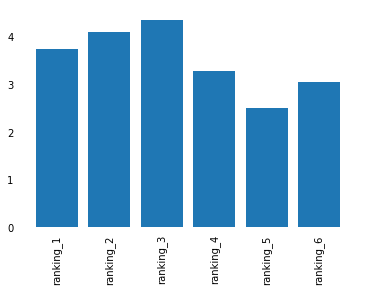

In [48]:
fig,ax = plt.subplots()

ax.bar(star_wars.columns[9:15],star_wars[star_wars.columns[9:15]].mean())

ax.set_xticklabels(star_wars.columns[9:15],rotation=90)


ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

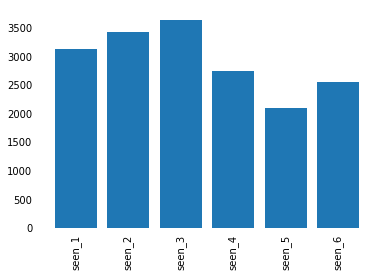

In [49]:
fig,ax = plt.subplots()

ax.bar(star_wars.columns[3:9],star_wars[star_wars.columns[9:15]].sum())

ax.set_xticklabels(star_wars.columns[3:9],rotation=90)



ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

In [50]:
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"]=="Female"]



Text(0.5,1,'What do Dudes think?')

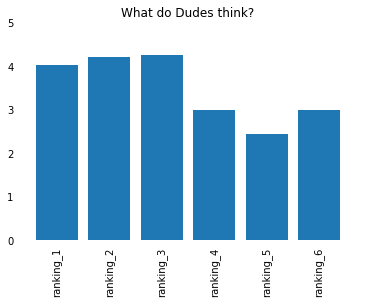

In [51]:
fig,ax = plt.subplots()

ax.bar(males.columns[9:15],males[males.columns[9:15]].mean())

ax.set_xticklabels(males.columns[9:15],rotation=90)
ax.set_ylim(0,5)


ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("What do Dudes think?")

Text(0.5,1,'What about chicks?')

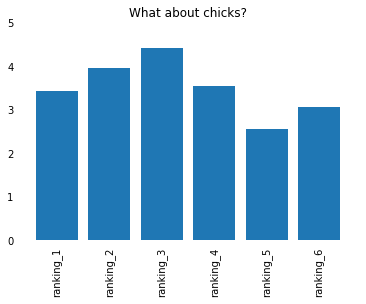

In [52]:
fig,ax = plt.subplots()

ax.bar(females.columns[9:15],females[females.columns[9:15]].mean())

ax.set_xticklabels(females.columns[9:15],rotation=90)
ax.set_ylim(0,5)

ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("What about chicks?")

In [53]:
star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]= star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].map(yesnomap)



In [55]:
pd.value_counts(star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].values)


False    641
True     427
dtype: int64

In [66]:
star_trek_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == True]
star_trek_nonfan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == False]


Text(0.5,1,'Rankings by Star Trek Fans')

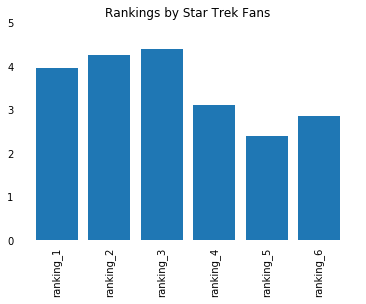

In [68]:
fig,ax = plt.subplots()

ax.bar(star_trek_fan.columns[9:15],star_trek_fan[star_trek_fan.columns[9:15]].mean())

ax.set_xticklabels(star_trek_fan.columns[9:15],rotation=90)
ax.set_ylim(0,5)

ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Rankings by Star Trek Fans")

Text(0.5,1,'Rankings by Star Trek Haters')

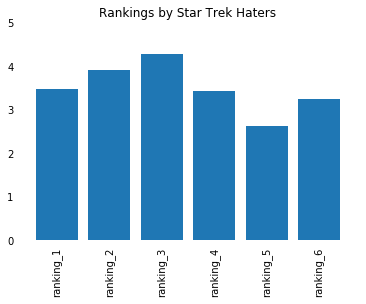

In [69]:
fig,ax = plt.subplots()

ax.bar(star_trek_nonfan.columns[9:15],star_trek_nonfan[star_trek_nonfan.columns[9:15]].mean())

ax.set_xticklabels(star_trek_nonfan.columns[9:15],rotation=90)
ax.set_ylim(0,5)

ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Rankings by Star Trek Haters")